# Potential Energy Surface Plotter

In [1]:
# from IPython.display import Image

In [2]:
# file = ('../images/Grabow_plots/Grabow_PES.png')
# Image(filename=file, width = 900) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

# plotting potential energy surface

the following takes a cantera cti/yaml file and loads it as a gas solution object and a surface Interface object. the species enthalpies and activation energies are plotted using the pes_plot object

In [27]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

import os
import sys
sys.path.append(f'{os.getcwd()}/tools')
import pes_plot


# get current RMG model:
# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [4]:
pes_plot_1 = pes_plot.pes_plot(cti_file_path)

['CO2*(15)', 'H*(10)']
CO2*(15) enthalpy = -3.935732375731608 eV
H*(10) enthalpy = -0.07494715091618852 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) enthalpy = 0.8744124166666666 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) -3.1362671099811297
CO2*(15) + H*(10) <=> COOH*(18) + X(1) enthalpy = 1.2208127500000001 eV
CO2*(15) + H*(10) <=> COOH*(18) + X(1) -2.789866776647796
[]
[]


[[(2, '--', 1, 'k')],
 [(3, '--', 1, 'k')],
 [(4, '--', 1, 'k')],
 [(5, '--', 1, 'k')],
 [],
 []]

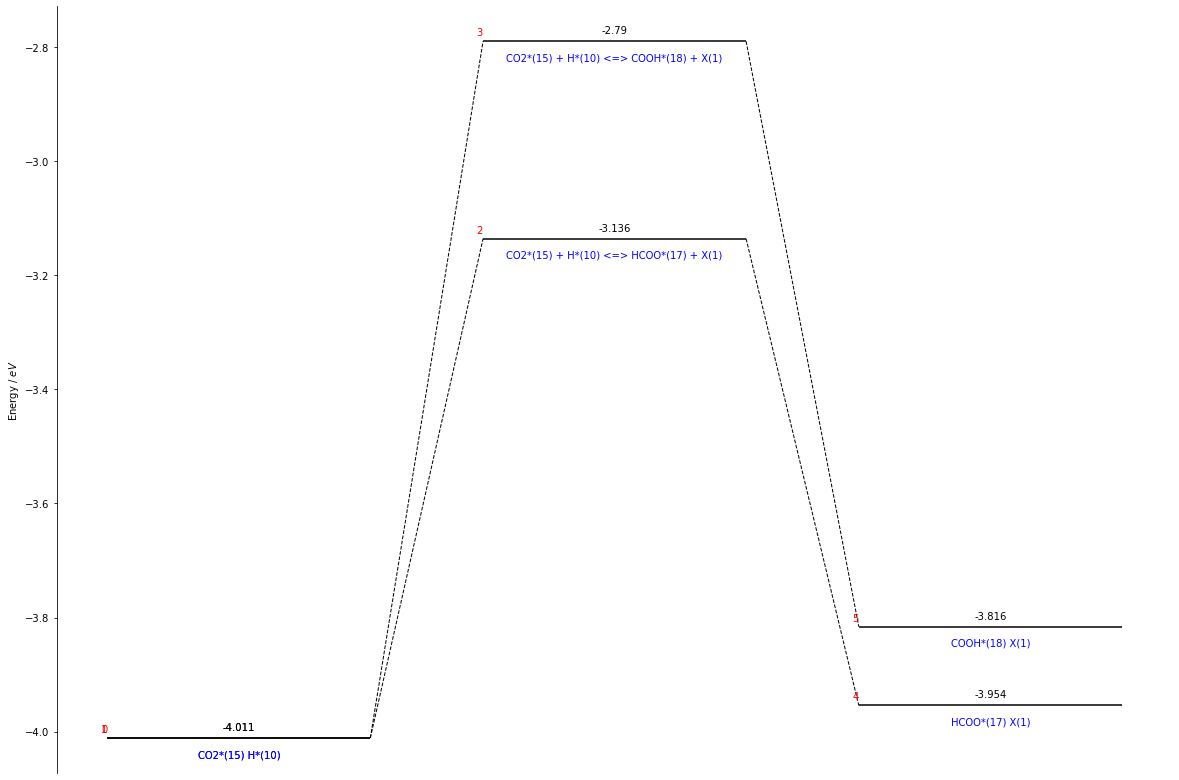

In [5]:
pes_plot_1.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)
pes_plot_1.diagram.links

In [6]:
pes_plot_1.diagram.data

[(-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.136, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.136, 'k', '', ''),
 (-2.79, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.79, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.816, 2, 'COOH*(18) X(1)', -3.816, 'k', '', '')]

['HCOO*(17)', 'X(1)']
HCOO*(17) enthalpy = -3.9542874356795434 eV
X(1) enthalpy = 2.0998838151865347e-06 eV
HCOO*(17) + X(1) <=> HCO*(16) + O*(11) enthalpy = 2.37193575 eV
HCOO*(17) + X(1) <=> HCO*(16) + O*(11) -1.5823495857957282


[[(2, '--', 1, 'k')],
 [(3, '--', 1, 'k')],
 [(4, '--', 1, 'k')],
 [(5, '--', 1, 'k')],
 [],
 [],
 [(7, '--', 1, 'k')],
 [(8, '--', 1, 'k')],
 []]

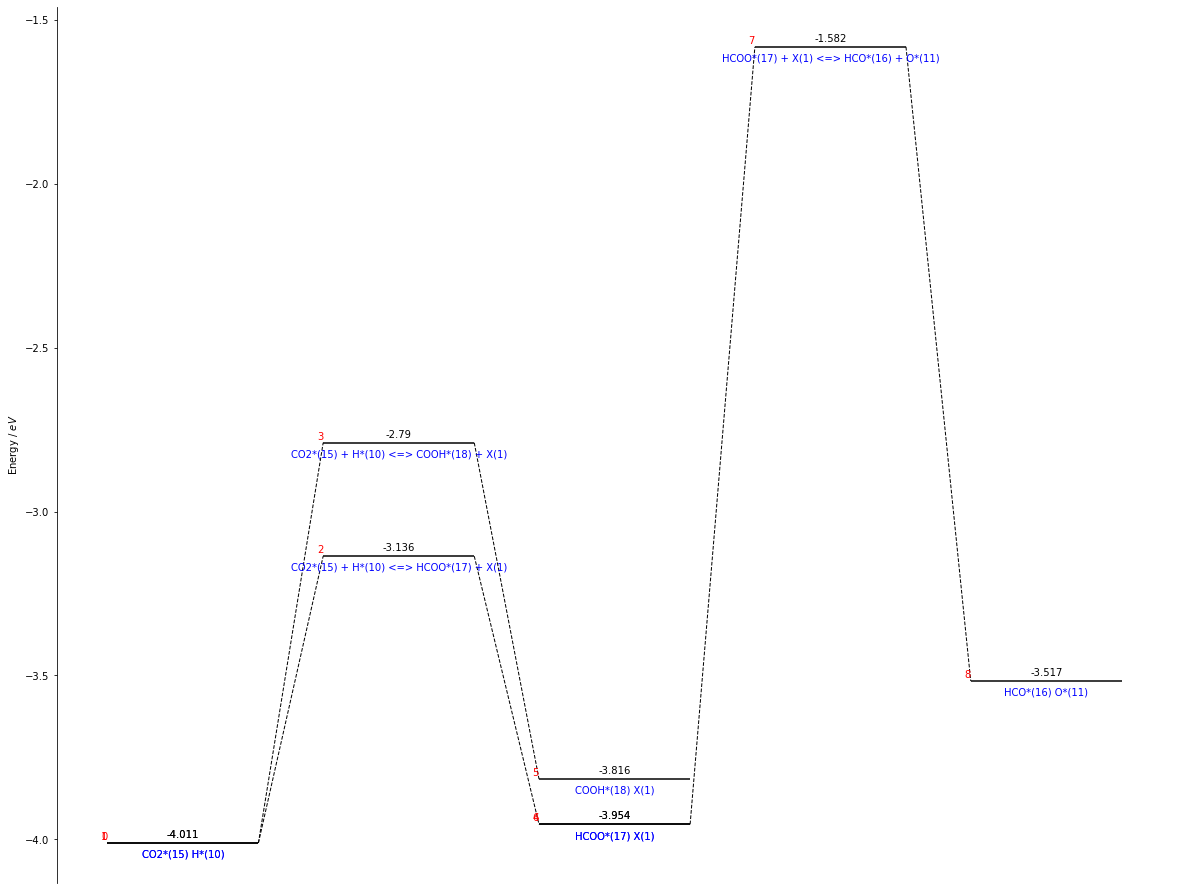

In [7]:
pes_plot_1.add_next_reaction(
    ["HCOO*(17)","X(1)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)
pes_plot_1.diagram.links

In [8]:
pes_plot_1.diagram.data

[(-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.136, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.136, 'k', '', ''),
 (-2.79, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.79, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.816, 2, 'COOH*(18) X(1)', -3.816, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-1.582, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.582, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', '')]

['HCO*(16)', 'O*(11)']
HCO*(16) enthalpy = -1.70734827454268 eV
O*(11) enthalpy = -1.8094686207044723 eV
HCO*(16) + O*(11) <=> CO*(14) + OH*(12) enthalpy = 0.0 eV
HCO*(16) + O*(11) <=> CO*(14) + OH*(12) -3.5168168952471524


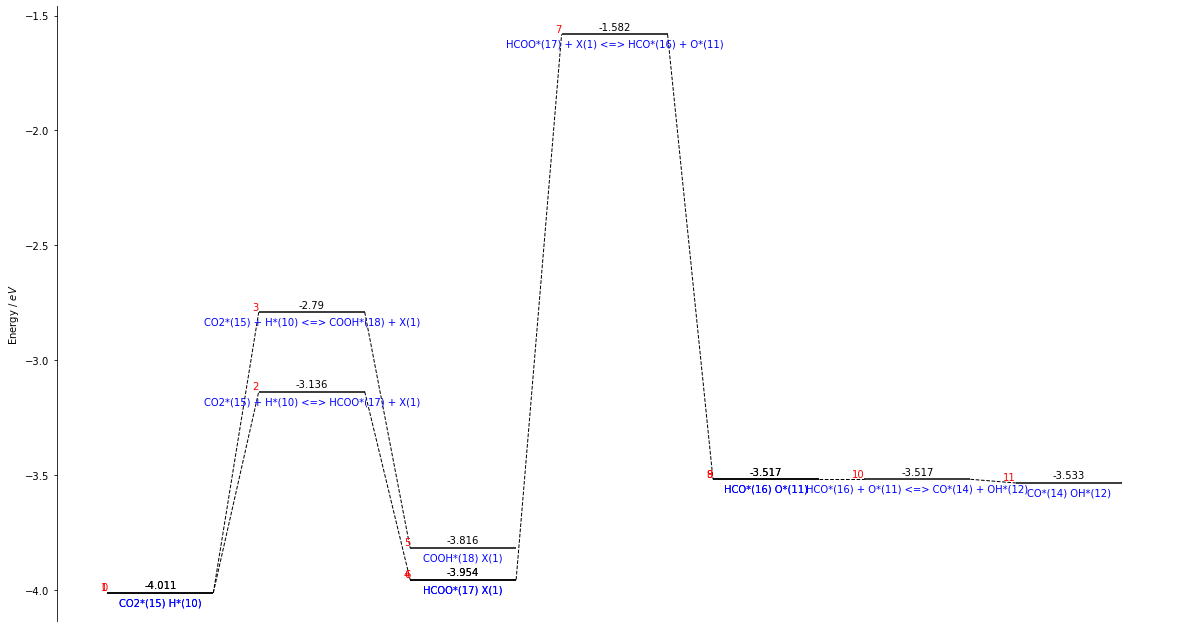

In [9]:
pes_plot_1.add_next_reaction(
    ["HCO*(16)","O*(11)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['CO*(14)', 'OH*(12)']
CO*(14) enthalpy = -1.7986614923990496 eV
OH*(12) enthalpy = -1.7339317965713736 eV
CO*(14) + OH*(12) <=> CO2*(15) + H*(10) enthalpy = 0.4031458333333333 eV
CO*(14) + OH*(12) <=> CO2*(15) + H*(10) -3.1294474556370897
CO*(14) + OH*(12) <=> COOH*(18) + X(1) enthalpy = 0.11981058333333333 eV
CO*(14) + OH*(12) <=> COOH*(18) + X(1) -3.4127827056370896


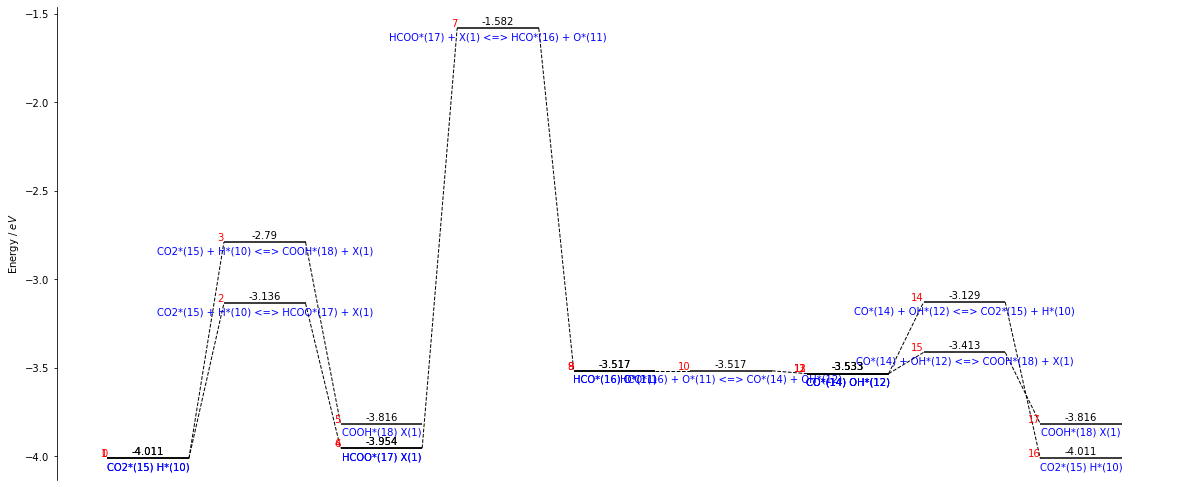

In [10]:
pes_plot_1.add_next_reaction(
    ["CO*(14)","OH*(12)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

In [11]:
pes_plot_1.diagram.data

[(-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-4.011, 0, 'CO2*(15) H*(10)', -4.011, 'k', '', ''),
 (-3.136, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.136, 'k', '', ''),
 (-2.79, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.79, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-3.816, 2, 'COOH*(18) X(1)', -3.816, 'k', '', ''),
 (-3.954, 2, 'HCOO*(17) X(1)', -3.954, 'k', '', ''),
 (-1.582, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.582, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', ''),
 (-3.517, 4, 'HCO*(16) O*(11)', -3.517, 'k', '', ''),
 (-3.517, 5, 'HCO*(16) + O*(11) <=> CO*(14) + OH*(12)', -3.517, 'k', '', ''),
 (-3.533, 6, 'CO*(14) OH*(12)', -3.533, 'k', '', ''),
 (-3.533, 6, 'CO*(14) OH*(12)', -3.533, 'k', '', ''),
 (-3.533, 6, 'CO*(14) OH*(12)', -3.533, 'k', '', ''),
 (-3.129, 7, 'CO*(14) + OH*(12) <=> CO2*(15) + H*(10)', -3.129, 'k', '', ''),
 (-3.413, 7, 'CO*(14) + OH*(12) <=> COOH*(18) + X(1)', -3.413, 'k', '', ''),
 

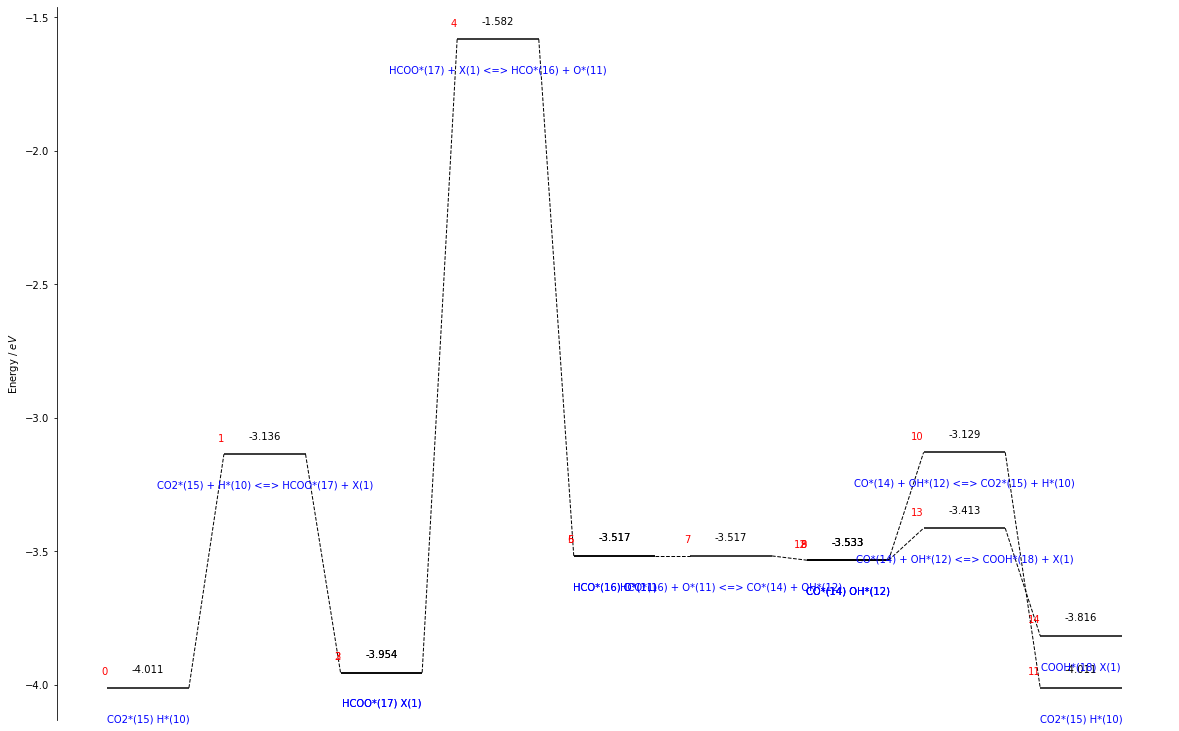

In [12]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> COOH*(18) + X(1)")

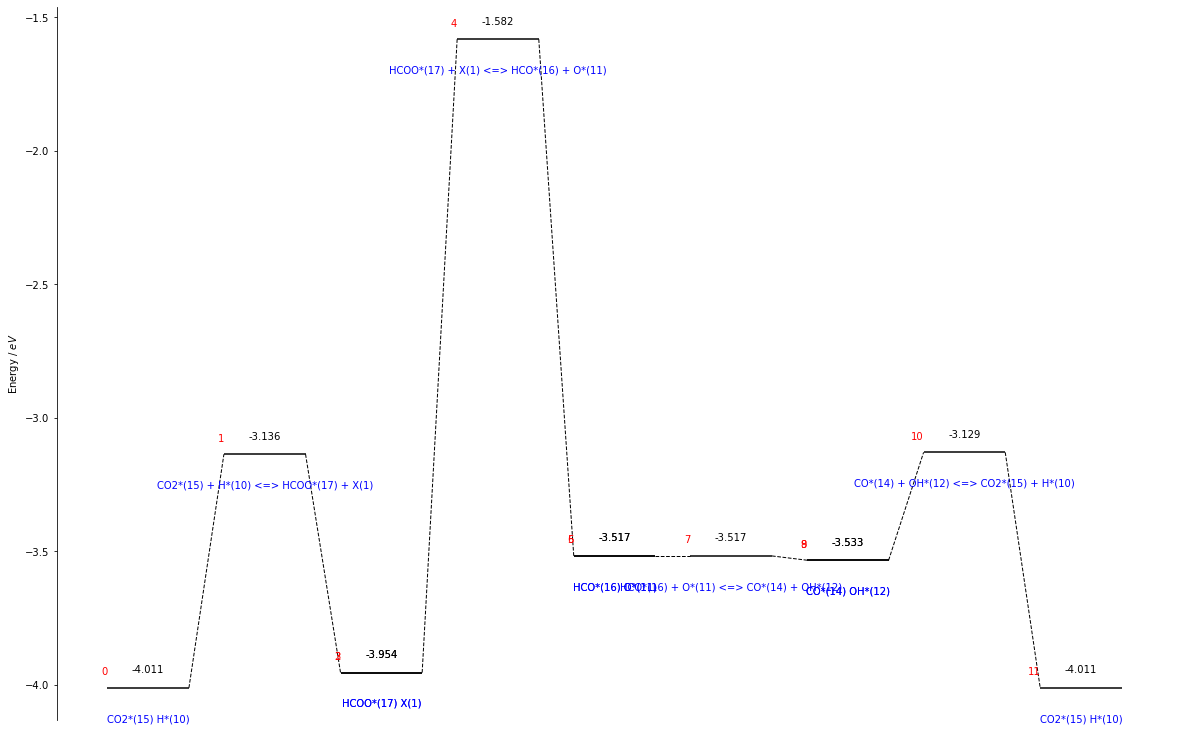

In [13]:
pes_plot_1.trim("CO*(14) + OH*(12) <=> COOH*(18) + X(1)")

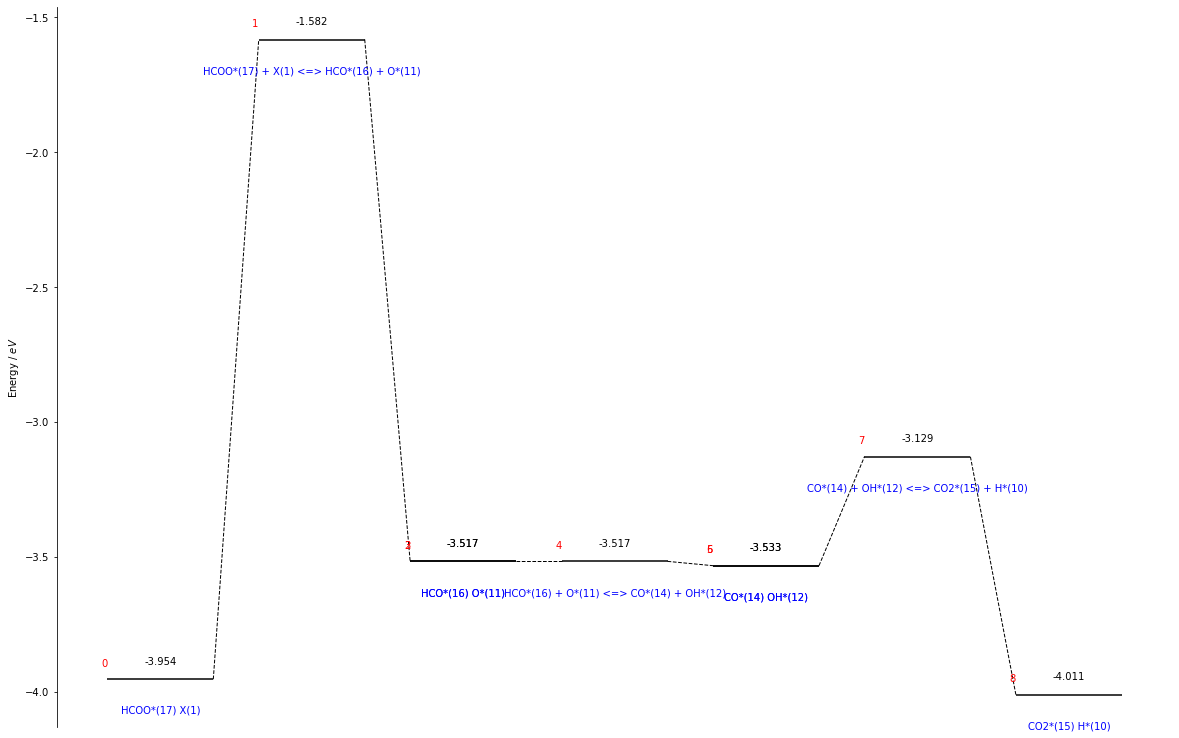

In [14]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

['CO2*(15)', 'H*(10)']
CO2*(15) enthalpy = -3.935732375731608 eV
H*(10) enthalpy = -0.07494715091618852 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) enthalpy = 0.8744124166666666 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) -3.1362671099811297
CO2*(15) + H*(10) <=> COOH*(18) + X(1) enthalpy = 1.2208127500000001 eV
CO2*(15) + H*(10) <=> COOH*(18) + X(1) -2.789866776647796


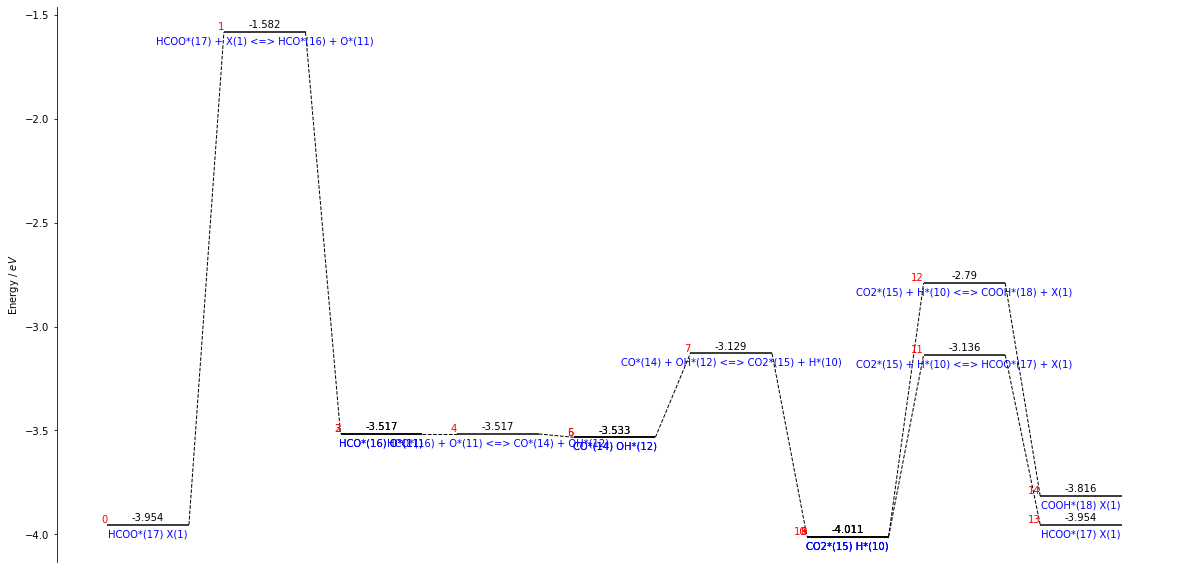

In [15]:
pes_plot_1.add_next_reaction(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['COOH*(18)']
COOH*(18) enthalpy = -3.8158877932084807 eV
COOH*(18) + H*(10) <=> HCOOH*(19) + X(1) enthalpy = 0.7336818333333334 eV
COOH*(18) + H*(10) <=> HCOOH*(19) + X(1) -3.0822059598751474
COOH*(18) + OH*(12) <=> CO2*(15) + H2O*(13) enthalpy = 0.0 eV
COOH*(18) + OH*(12) <=> CO2*(15) + H2O*(13) -3.8158877932084807
CH2O*(20) + COOH*(18) <=> CH3O2*(22) + CO*(14) enthalpy = 0.4221045833333333 eV
CH2O*(20) + COOH*(18) <=> CH3O2*(22) + CO*(14) -3.3937832098751475
COOH*(18) + HCOO*(17) <=> CO2*(15) + HCOOH*(19) enthalpy = 0.7723838333333334 eV
COOH*(18) + HCOO*(17) <=> CO2*(15) + HCOOH*(19) -3.043503959875147
COOH*(18) + HCOO*(17) <=> CO2*(15) + HCOOH*(19) enthalpy = 0.7723838333333334 eV
COOH*(18) + HCOO*(17) <=> CO2*(15) + HCOOH*(19) -3.043503959875147
2 COOH*(18) <=> CO2*(15) + HCOOH*(19) enthalpy = 0.6696143333333334 eV
2 COOH*(18) <=> CO2*(15) + HCOOH*(19) -3.146273459875147
COOH*(18) + HCO*(16) <=> CH2O*(20) + CO2*(15) enthalpy = 1.1242320833333335 eV
COOH*(18) + HCO*(16) <=> CH2O*(

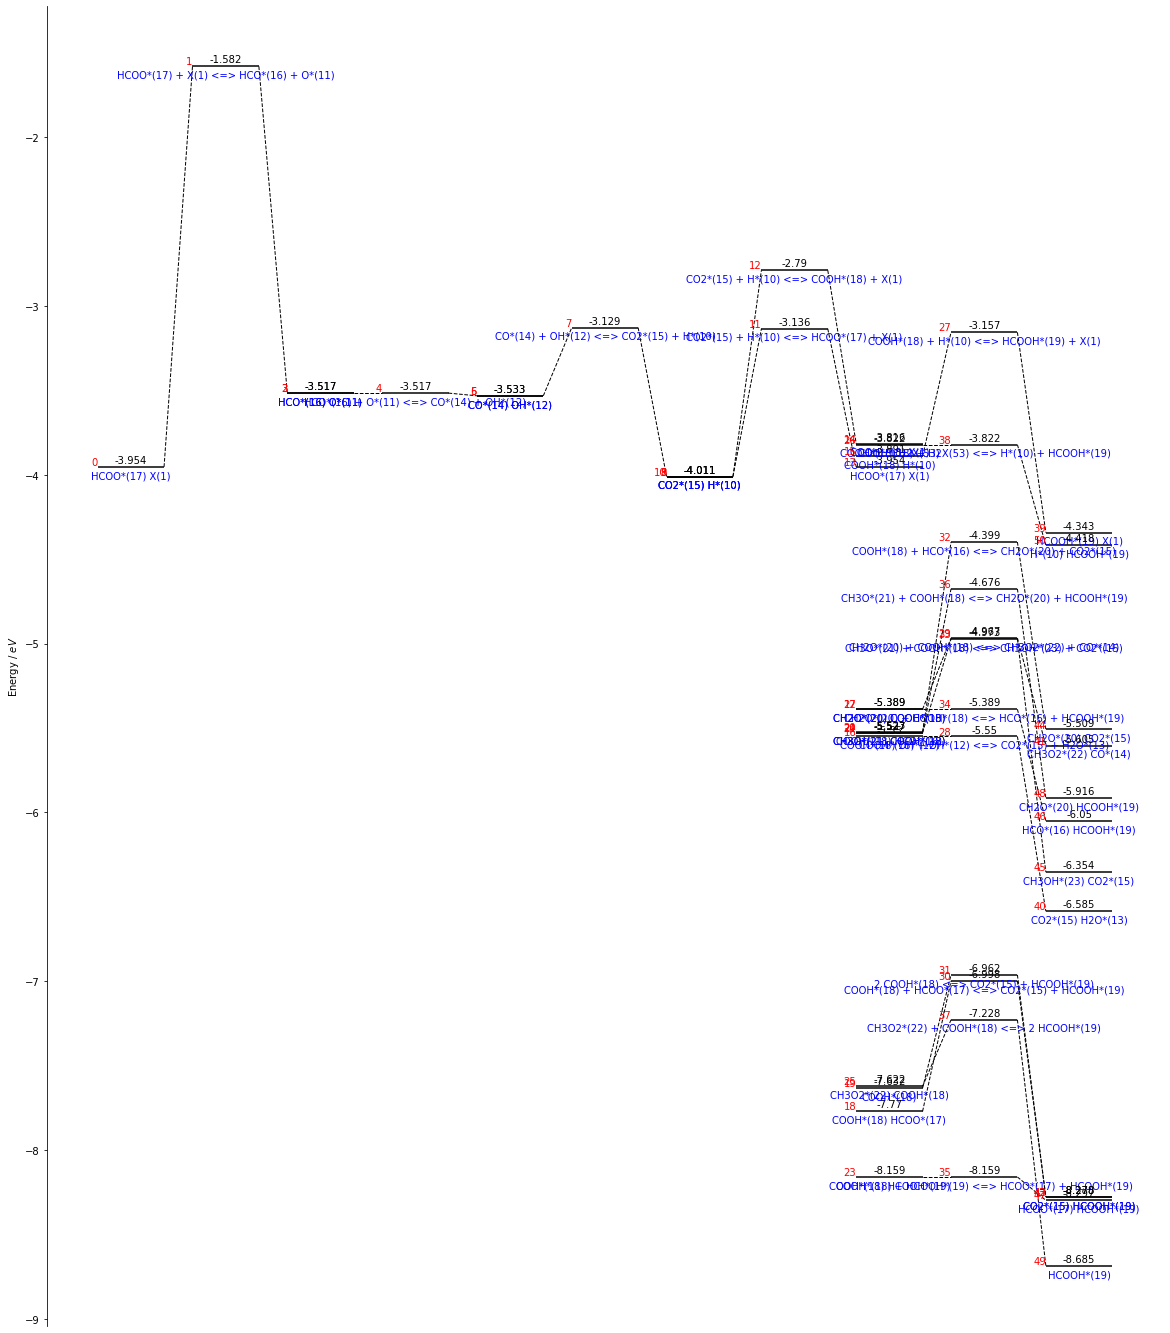

In [24]:
pes_plot_1.add_next_reaction(
    ["COOH*(18)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

## PES_plot_2

In [28]:
pes_plot_2 = pes_plot.pes_plot(cti_file_path)

In [29]:
pes_plot_2.gas.species_names

['N2',
 'Ne',
 'H2(2)',
 'CO(3)',
 'CO2(4)',
 'H2O(5)',
 'CH2O(6)',
 'HCOOH(7)',
 'CH3OH(8)',
 'HCOOCH3(9)',
 'CH4(24)']

In [30]:
pes_plot_2.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'H2X(53)']

['CO2*(15)', 'H*(10)']
CO2*(15) enthalpy = -3.935732375731608 eV
H*(10) enthalpy = -0.07494715091618852 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) enthalpy = 0.8744124166666666 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) -3.1362671099811297
CO2*(15) + H*(10) <=> COOH*(18) + X(1) enthalpy = 1.2208127500000001 eV
CO2*(15) + H*(10) <=> COOH*(18) + X(1) -2.789866776647796
[]
[]


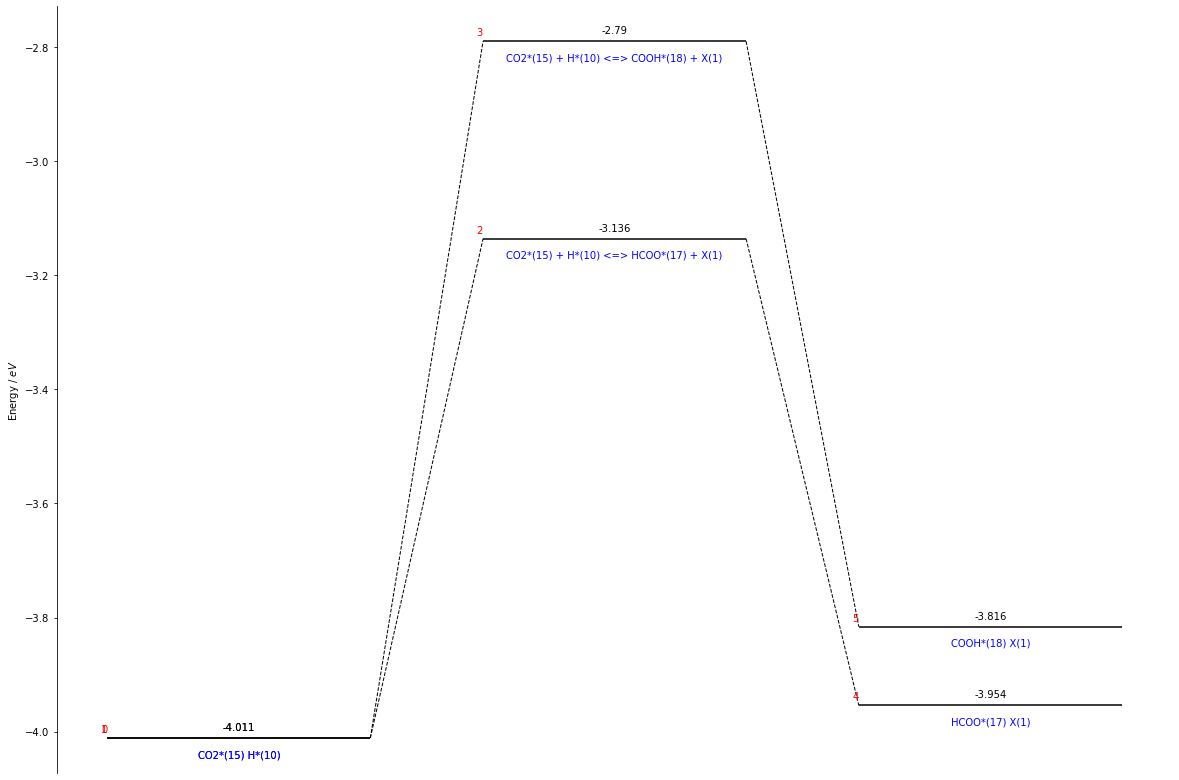

In [31]:
pes_plot_2.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## PES_plot_3

['H2X(53)']
H2X(53) enthalpy = -0.0065747045105605285 eV
H2X(53) + O*(11) <=> H*(10) + OH*(12) enthalpy = 1.6202975833333333 eV
H2X(53) + O*(11) <=> H*(10) + OH*(12) 1.6137228788227727
H2X(53) + OH*(12) <=> H*(10) + H2O*(13) enthalpy = 0.0 eV
H2X(53) + OH*(12) <=> H*(10) + H2O*(13) -0.0065747045105605285
CO*(14) + H2X(53) <=> H*(10) + HCO*(16) enthalpy = 1.267752 eV
CO*(14) + H2X(53) <=> H*(10) + HCO*(16) 1.2611772954894394
CO2*(15) + H2X(53) <=> H*(10) + HCOO*(17) enthalpy = 0.9838501666666667 eV
CO2*(15) + H2X(53) <=> H*(10) + HCOO*(17) 0.9772754621561062
CO2*(15) + H2X(53) <=> COOH*(18) + H*(10) enthalpy = 0.9838501666666667 eV
CO2*(15) + H2X(53) <=> COOH*(18) + H*(10) 0.9772754621561062
H2X(53) + HCOO*(17) <=> H*(10) + HCOOH*(19) enthalpy = 0.0 eV
H2X(53) + HCOO*(17) <=> H*(10) + HCOOH*(19) -0.0065747045105605285
COOH*(18) + H2X(53) <=> H*(10) + HCOOH*(19) enthalpy = 0.0 eV
COOH*(18) + H2X(53) <=> H*(10) + HCOOH*(19) -0.0065747045105605285
CH2O*(20) + H2X(53) <=> CH3O*(21) + H*(10)

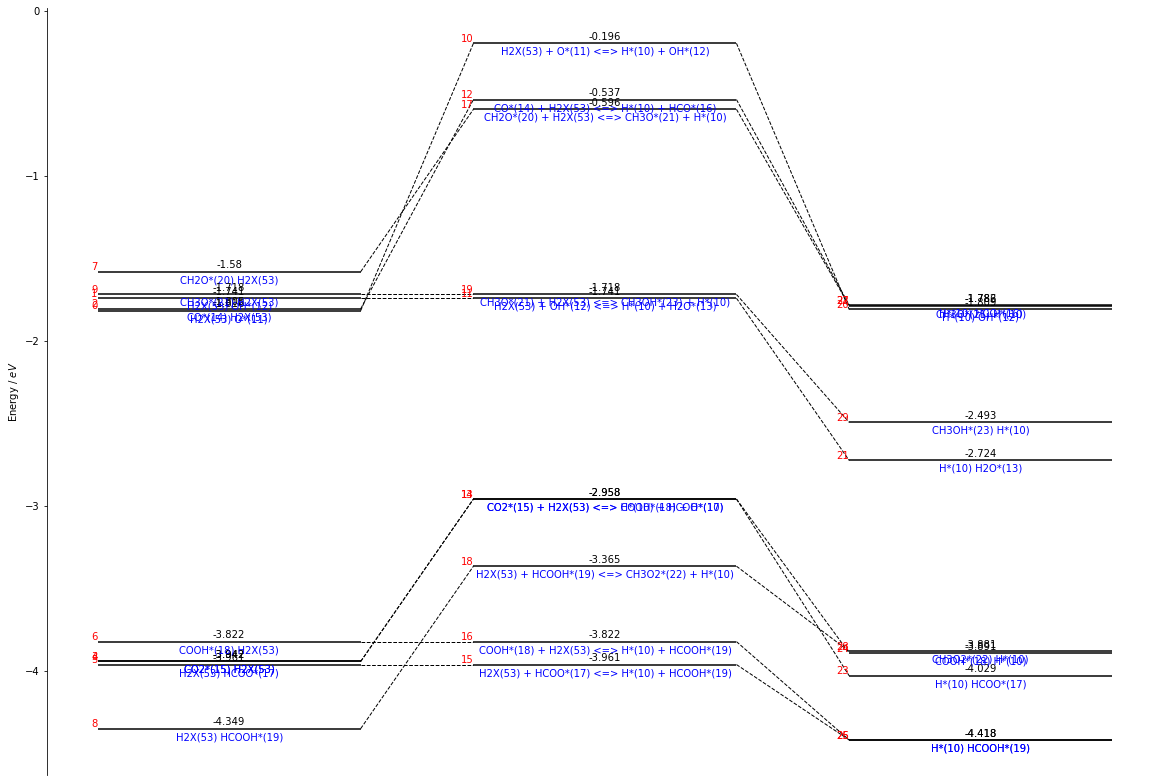

In [32]:
pes_plot_3 = pes_plot.pes_plot(cti_file_path)

pes_plot_3.plot_pes_diagram(
    ["H2X(53)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

['COOH*(18)', 'HCOOH*(19)']
COOH*(18) enthalpy = -3.8158877932084807 eV
HCOOH*(19) enthalpy = -4.342721892053458 eV
COOH*(18) + HCOOH*(19) <=> HCOO*(17) + HCOOH*(19) enthalpy = 0.0 eV
COOH*(18) + HCOOH*(19) <=> HCOO*(17) + HCOOH*(19) -8.158609685261938
[]


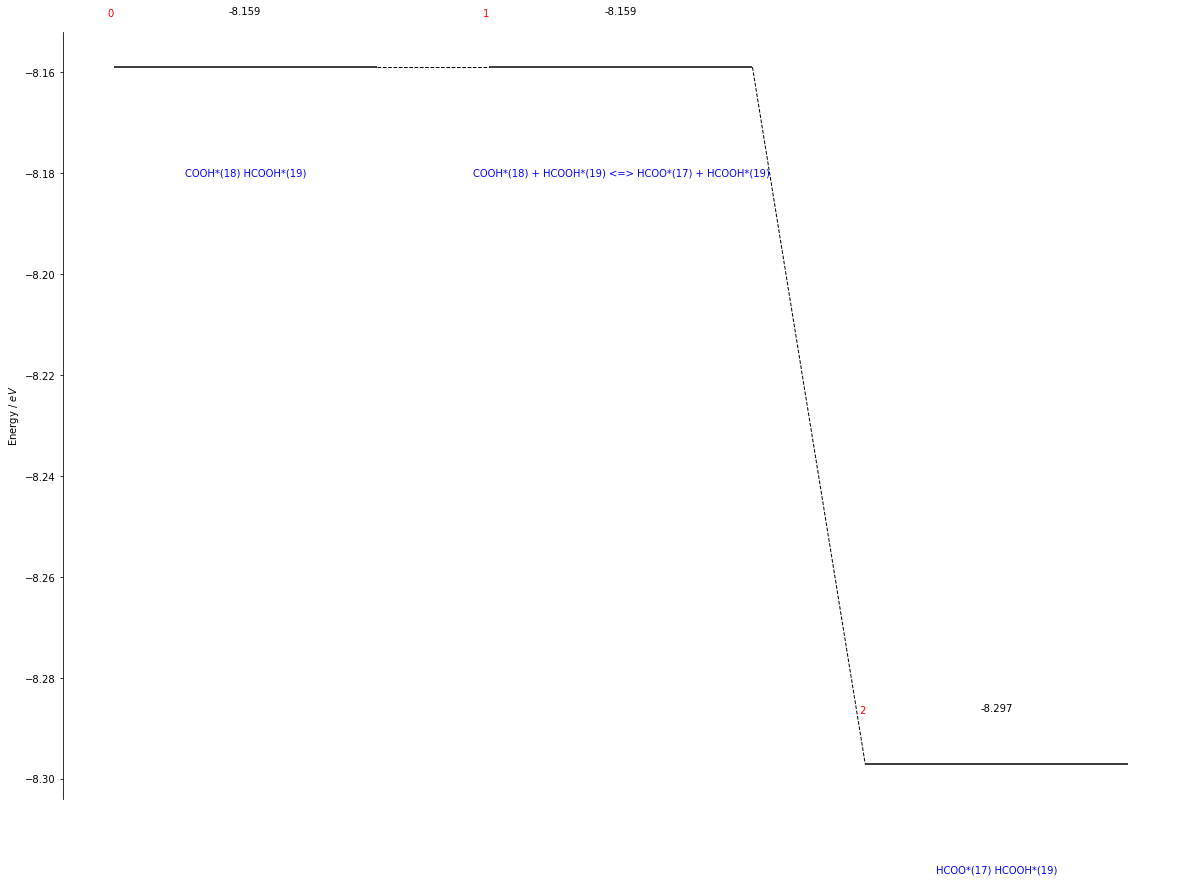

In [19]:
pes_plot_3 = pes_plot.pes_plot(cti_file_path)

pes_plot_3.plot_pes_diagram(
    ["COOH*(18)", "HCOOH*(19)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## Compare to Bjarne's mechanism

In [20]:
bjarne_file_path = '../../External_data/Bjarne_CO2_mechanism/CO2_hydrogenation_Bjarne.cti'
pes_plot_2 = pes_plot.pes_plot(bjarne_file_path)

In [21]:
pes_plot_2.diagram.links

[]

['site(7)', 'H2(4)']
site(7) enthalpy = 2.0999032818904116e-06 eV
H2(4) enthalpy = 0.06967398685096561 eV
H2(4) + 2 site(7) <=> 2 HX(8) enthalpy = 0.21739366666666668 eV
H2(4) + 2 site(7) <=> 2 HX(8) 0.2870697534209142
[]


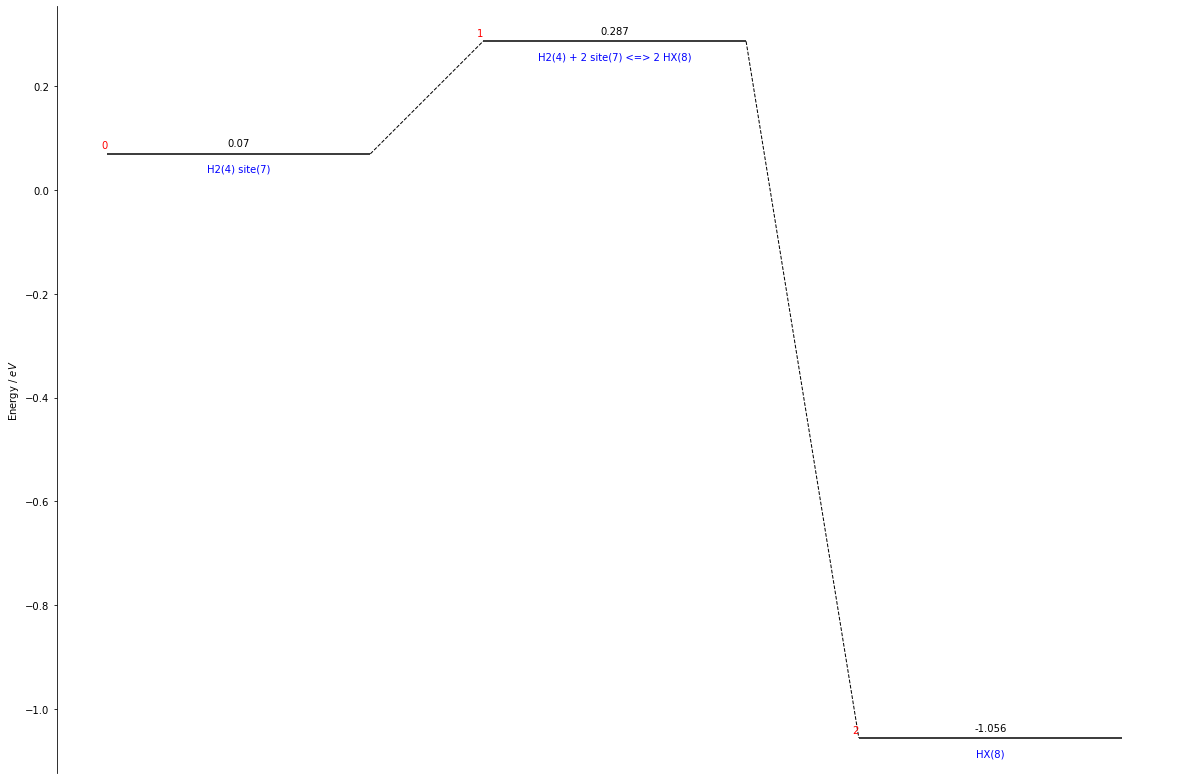

In [22]:
pes_plot_2.plot_pes_diagram(
    ["site(7)","H2(4)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)